In [3]:
import os
import sys
import glob
import gzip
import subprocess as sp
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

from lungsc.ingest.load_dataset import DatasetLung, versions



if __name__ == '__main__':

    ds = DatasetLung.load(preprocess=True, version=versions[-2], include_hyperoxia=True)
    ds.query_samples_by_metadata('(cellType == "immune") & (doublet == 0)', inplace=True)

ModuleNotFoundError: No module named 'lungsc'

In [19]:
adata = ds.to_AnnData()

In [20]:
adata

AnnData object with n_obs × n_vars = 5247 × 18072
    obs: 'DC', 'Gender', 'Plate', 'SortType', 'Timepoint', 'Well', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'number_of_genes_1plusreads', 'Time [days]', 'Treatment', 'TimepointHO', 'Mousename'
    var: 'Chromosome', 'Gene stable ID', 'GeneName', 'Strand', 'missing_info', 'n_geneIds'

In [21]:
idx = adata.obs['Timepoint'] == "P7"
adataP7 = adata[idx]

In [22]:
adataP7

View of AnnData object with n_obs × n_vars = 2171 × 18072
    obs: 'DC', 'Gender', 'Plate', 'SortType', 'Timepoint', 'Well', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'number_of_genes_1plusreads', 'Time [days]', 'Treatment', 'TimepointHO', 'Mousename'
    var: 'Chromosome', 'Gene stable ID', 'GeneName', 'Strand', 'missing_info', 'n_geneIds'

{'fig': <Figure size 93.6x72 with 2 Axes>,
 'ax': <AxesSubplot:title={'center':'Gapdh'}>}

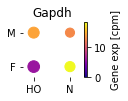

In [79]:
gene = "Actb"
cell_type = "B cell"

def my_dotplot(gene, cell_type, scaling=2.):
    import matplotlib as mpl
    
    df = adataP7.obs[['Gender', 'Treatment', 'cellSubtype']].copy()
    df[gene] = adataP7[:, gene].X.toarray()[:, 0]
    df['is_expressed'] = df[gene] > 0

    gby = df.groupby(['cellSubtype', 'Gender', 'Treatment']).mean()
    mean_expression = gby.loc[cell_type, gene]
    frac_expressed =  gby.loc[cell_type, 'is_expressed']
    
    ###############################  
    mean_expression_norm = mean_expression / mean_expression.max()
    colors = plt.cm.get_cmap('plasma')(mean_expression_norm)
    
    size = (0 + (195) * frac_expressed) * scaling**2

    fig, ax = plt.subplots(figsize=(scaling * 1.3, scaling * 1))
    x = [0, 1, 0, 1]
    y = [0, 0, 1, 1]
    ax.scatter(x, y, s=size, c=colors)
    ax.set_xlim(-0.3, 1.3)
    ax.set_ylim(-0.3, 1.3)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['HO', 'N'])
    ax.set_yticklabels(['F', 'M'])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(gene)   
    ###############################  
    
    
    norm = mpl.colors.Normalize(vmin=0, vmax=mean_expression.max())
    cmap = plt.cm.get_cmap('plasma')
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Gene exp [cpm]')

    
    return {'fig': fig, 'ax': ax}

my_dotplot('Gapdh', 'neutrophil', scaling=1)


{'fig': <Figure size 72x72 with 1 Axes>,
 'ax': <AxesSubplot:title={'center':'Ccr2'}>}

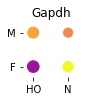

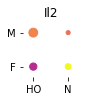

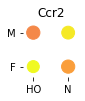

In [56]:
my_dotplot('Gapdh', 'neutrophil')
my_dotplot('Il2', 'T cell')
my_dotplot('Ccr2', 'Mac II')

In [42]:
mean_expression

Gender  Treatment
F       hyperoxia    15588.402344
        normal        8835.468750
M       hyperoxia    22497.203125
        normal       10123.586914
Name: Actb, dtype: float32

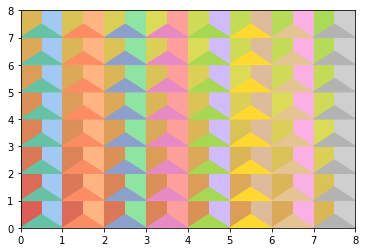

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import seaborn as sns

colors1 = sns.color_palette('hls', 64)
colors2 = sns.color_palette('pastel', 64)
colors3 = sns.color_palette('Set2', 64)
#colors = plt.cm.get_cmap('plasma')(mean_expression_norm)

fig, ax = plt.subplots()
patches = []
for a in range(8):
    for b in range(8):
        dots1 = [[a, b],
                [a, b+1],
                [a+0.5, b+1],
                [a+0.5, b+0.5],
        ]
        e1 = mpatches.Polygon(np.array(dots1), color=colors[a+b])
        
        #patches.append(e1)
#collection = PatchCollection(patches, color= colors)
#ax.add_collection(collection)
        ax.add_patch(e1)
        
        dots2 = [[a+0.5, b+0.5],
                [a+0.5, b+1],
                [a+1, b+1],
                [a+1, b],
        ]
        e2 = mpatches.Polygon(np.array(dots2), color=colors2[a])
        ax.add_patch(e2)
        
        dots3 = [[a+0.5, b+0.5],
                [a, b],
                [a+1, b],
        ]
        e3 = mpatches.Polygon(np.array(dots3), color=colors3[a])
        ax.add_patch(e3)
    
    
ax.set_xlim([0,8])
ax.set_ylim([0,8])
plt.show()

In [34]:
intern[(ct1, ct2, condition)] = len(inters[(ct1, ct2, condition)])
norm_intern[(ct1, ct2, condition)] = intern[(ct1, ct2, condition)]/intern.max()

colors = {}
colors[(ct1, ct2, condition)] = plt.cm.get_cmap('plasma')(norm_intern[(ct1, ct2, condition)])

In [40]:
colors[(0, 0)]

array([0.050383, 0.029803, 0.527975, 1.      ])